In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install geopandas --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 70.0 MB/s eta 0:00:00


In [ ]:
!unzip '/content/drive/MyDrive/NUS/travel_pattern_data_2020' -d '/content/'

unzip:  cannot find or open /content/drive/MyDrive/NUS/travel_pattern_data_2020, /content/drive/MyDrive/NUS/travel_pattern_data_2020.zip or /content/drive/MyDrive/NUS/travel_pattern_data_2020.ZIP.


In [ ]:
!unzip '/content/Interactive-Choropleth-Map-Using-Python-master.zip' -d '/content/'

unzip:  cannot find or open /content/Interactive-Choropleth-Map-Using-Python-master.zip, /content/Interactive-Choropleth-Map-Using-Python-master.zip.zip or /content/Interactive-Choropleth-Map-Using-Python-master.zip.ZIP.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os
path='/content/drive/MyDrive/NUS /2020_2022_2YR_DATA'
directory = os.path.join(path)
x=0
data=pd.DataFrame(columns=['ds', 'polygon1_id', 'polygon1_name', 'latitude1', 'longitude1',
       'polygon2_id', 'polygon2_name', 'latitude2', 'longitude2',
       'metric_value', 'metric_name'])
for root,dirs,files in os.walk(directory):
  for i in files:
    df=pd.read_csv('/content/drive/MyDrive/NUS /2020_2022_2YR_DATA/'+i)
    df1=df[df['polygon2_name']=='india']
    data=data.append(df1,ignore_index=True)

    
    
    


In [ ]:
data.shape

(7520, 11)

In [ ]:
data.head()

,ds,polygon1_id,polygon1_name,latitude1,longitude1,polygon2_id,polygon2_name,latitude2,longitude2,metric_value,metric_name
0,2021-12-11,851705715169048,saudi arabia,23.716667,44.116667,417158592211893,india,21.0,77.0,1945,travel counts
1,2021-12-11,810648062654687,canada,56.000000,-109.000000,417158592211893,india,21.0,77.0,1092,travel counts
2,2021-12-11,549126165612289,nepal,26.533333,86.733333,417158592211893,india,21.0,77.0,19761,travel counts
3,2021-12-11,343315869635106,philippines,11.333331,123.016669,417158592211893,india,21.0,77.0,1296,travel counts
4,2021-12-11,711084376012350,vietnam,14.016667,107.900000,417158592211893,india,21.0,77.0,1027,travel counts


In [ ]:
data.to_csv('/content/2020_2021.csv',index=False)

In [ ]:
df=pd.read_csv('/content/2020-04_TO_2020_10_TRAVEL_PATTERN_DATA_COVID_WAVE_1.csv')

In [ ]:
df.head()

,ds,polygon1_id,polygon1_name,latitude1,longitude1,polygon2_id,polygon2_name,latitude2,longitude2,metric_value,metric_name
0,2020-04-01,597585864063467,united arab emirates,23.783333,54.000000,417158592211893,india,21.0,77.0,2522,travel counts
1,2020-04-01,366682297538943,pakistan,29.000000,69.000000,417158592211893,india,21.0,77.0,5034,travel counts
2,2020-04-01,937148070010051,united states,40.000000,-100.000000,417158592211893,india,21.0,77.0,1203,travel counts
3,2020-04-01,346733206197678,indonesia,-0.834900,113.466800,417158592211893,india,21.0,77.0,2333,travel counts
4,2020-04-01,376031519676735,bangladesh,24.016667,89.866667,417158592211893,india,21.0,77.0,12852,travel counts


In [ ]:
df2=df[df['polygon1_name']=='india']

In [ ]:
df=df[df['polygon2_name']=='india']

In [ ]:
import geopandas as gpd
shapefile = '/content/Interactive-Choropleth-Map-Using-Python-master/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry1 = [Point(xy) for xy in zip(df['longitude1'],df['latitude1'])]
gdf = GeoDataFrame(df, geometry=geometry1)   


In [ ]:
#this is a simple map that goes with geopandas
country= gpd.read_file('/content/Interactive-Choropleth-Map-Using-Python-master/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp')

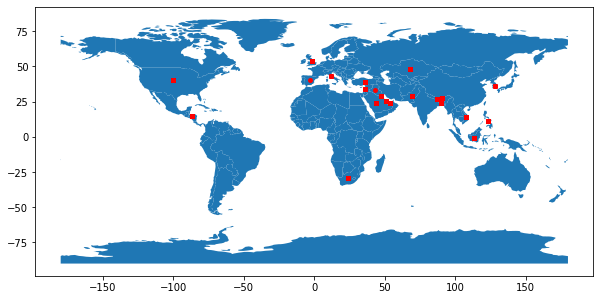

In [ ]:
# up=india_states[india_states['st_nm'].isin(['Uttar Pradesh','Madhya Pradesh','Haryana','Rajasthan','Chhattisgarh','Maharashtra','Gujarat','Odisha'])]

gdf.plot(ax=country.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

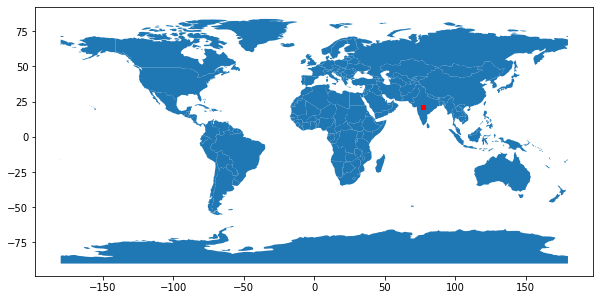

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry1 = [Point(xy) for xy in zip(df['longitude2'],df['latitude2'])]
gdf = GeoDataFrame(df, geometry=geometry1)   
#this is a simple map that goes with geopandas
country= gpd.read_file('/content/Interactive-Choropleth-Map-Using-Python-master/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp')
gdf.plot(ax=country.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

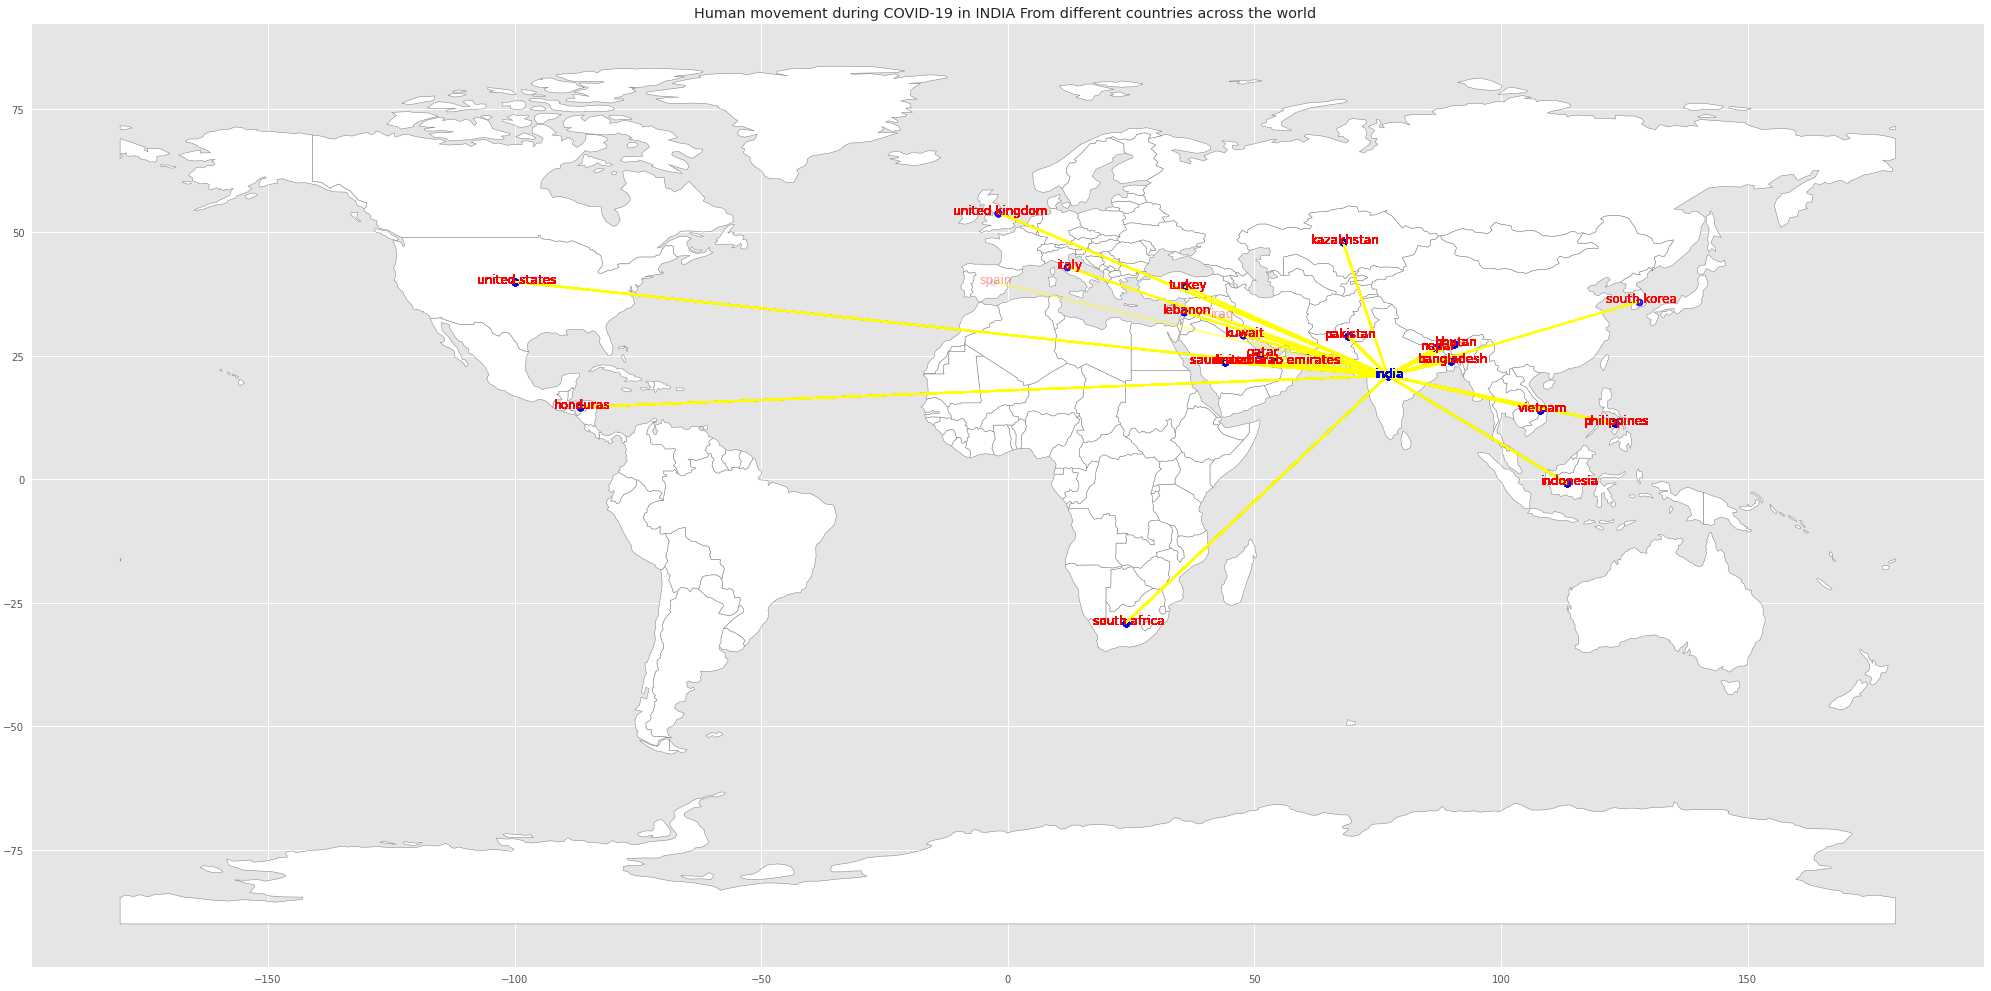

In [ ]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    country.plot(figsize=(35,20), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    for slat, dlat, slon, dlon, src_cty, dest_cty in zip(df['latitude1'],df['latitude2'],df['longitude1'],df['longitude2'],df['polygon1_name'],df['polygon2_name']):
        plt.plot([slon , dlon], [slat, dlat], color="yellow", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="blue", alpha=0.1)
        plt.text(slon+0.5, slat+0.5, src_cty, fontsize=12, color="red", alpha=0.4, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.5, dlat+0.5, dest_cty, fontsize=12, color="blue", alpha=0.9, horizontalalignment='center', verticalalignment='center')

    plt.title("Human movement during COVID-19 in INDIA From different countries across the world ")

    plt.savefig("COVID WAVE-1 TRAVELLING PATTERN.png", dpi=100)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv('/content/2020_2021.csv')
df2=pd.read_csv('/content/covid_data_India.csv')
df3=pd.read_csv('/content/covid_vaccination_data_India.csv')

In [ ]:
df1.rename(columns = {'ds':'date'}, inplace = True)

In [ ]:
df1.columns

Index(['date', 'polygon1_id', 'polygon1_name', 'latitude1', 'longitude1',
       'polygon2_id', 'polygon2_name', 'latitude2', 'longitude2',
       'metric_value', 'metric_name'],
      dtype='object')

In [ ]:
df1.shape

(7520, 11)

In [ ]:
df2.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df2.shape

(1082, 67)

In [ ]:
df2.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,IND,Asia,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
1,IND,Asia,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2,IND,Asia,India,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
3,IND,Asia,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
4,IND,Asia,India,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0


In [ ]:
df1=df1.merge(df2[['date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'population',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million']],on='date')

In [ ]:
df1.to_csv('covid_world_data_travel_merged_2020_2021.csv',index=False)

In [ ]:
df1.head()

,date,polygon1_id,polygon1_name,latitude1,longitude1,polygon2_id,polygon2_name,latitude2,longitude2,metric_value,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2021-12-11,851705715169048,saudi arabia,23.716667,44.116667,417158592211893,india,21.0,77.0,1945,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
1,2021-12-11,810648062654687,canada,56.000000,-109.000000,417158592211893,india,21.0,77.0,1092,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2,2021-12-11,549126165612289,nepal,26.533333,86.733333,417158592211893,india,21.0,77.0,19761,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
3,2021-12-11,343315869635106,philippines,11.333331,123.016669,417158592211893,india,21.0,77.0,1296,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
4,2021-12-11,711084376012350,vietnam,14.016667,107.900000,417158592211893,india,21.0,77.0,1027,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
